<a href="https://colab.research.google.com/github/rickOO7/islr/blob/main/ISLR_LAB_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab in Ch-3 Linear Regression of Introduction to Statistical Learning

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from scipy import stats
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#Diagonistic Plots
!pip install lmdiag

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading Dataset

In [2]:



# Load Boston housing data set
boston = load_boston()
# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        08:34:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

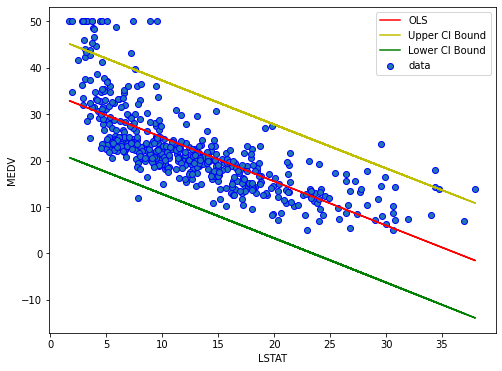

In [3]:
results=smf.ols('MEDV~LSTAT',data=boston_df).fit()
print(results.summary())
beta0,beta1=results.params
prstd, iv_l, iv_u = wls_prediction_std(results)
fig,ax = plt.subplots(figsize=(8,6))

ax.scatter(boston_df.LSTAT, boston_df.MEDV, edgecolors='b',label="data")
ax.set_ylabel('MEDV')
ax.set_xlabel('LSTAT')

ax.plot(boston_df.LSTAT, results.fittedvalues,color='r', label="OLS")
ax.plot(boston_df.LSTAT, iv_u, 'y',label='Upper CI Bound')
ax.plot(boston_df.LSTAT, iv_l, 'g',label='Lower CI Bound')
ax.legend()



In [4]:
#Confidence Interval
print(results.conf_int(alpha=0.05))
#Prediction and Mean Response Interval
exog1=pd.DataFrame([5,10],columns=['LSTAT'])
predictions = results.get_prediction(exog1)
predictions.summary_frame(alpha=0.05)

                   0          1
Intercept  33.448457  35.659225
LSTAT      -1.026148  -0.873951


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

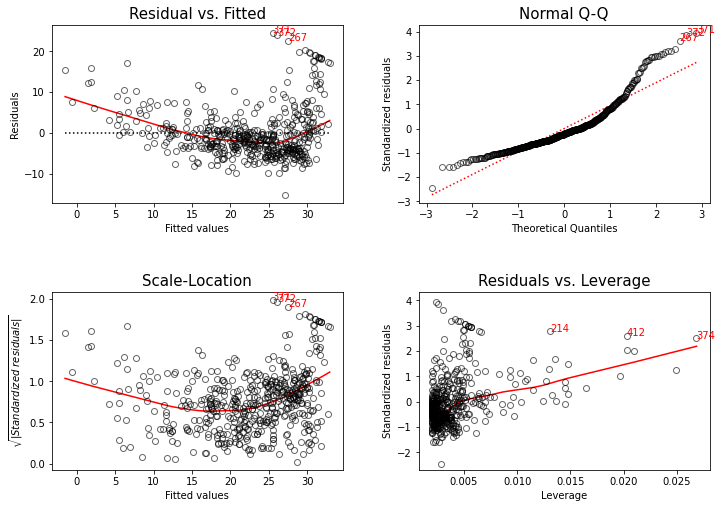

In [5]:
import lmdiag as lm
plt.figure(figsize=(10,7))
lm.plot(results)

In [6]:
#Access standardized residuals, cook's values, hatvalues (leverage) etc. easily in Python?

#create instance of influence
influence = results.get_influence()

#leverage (hat values)
leverage = influence.hat_matrix_diag

#Cook's D values (and p-values) as tuple of arrays
cooks_d = influence.cooks_distance

#standardized residuals
standardized_residuals = influence.resid_studentized_internal

#studentized residuals
studentized_residuals = influence.resid_studentized_external


In [7]:
print(np.argmax(leverage))

374


# Multiple Linear Regression

In [8]:
results1=smf.ols('MEDV~LSTAT+AGE',data=boston_df).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           2.98e-88
Time:                        08:34:07   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [9]:
Y=boston_df.iloc[:,-1].values.reshape(-1,1)
X = sm.add_constant(boston_df.iloc[:,0:-1])
model2=sm.OLS(Y,X)
results2=model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        08:34:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0




# Multicollinearity

In [11]:
#calculate VIF for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif


,VIF,variable
0,585.265238,const
1,1.792192,CRIM
2,2.298758,ZN
3,3.991596,INDUS
4,1.073995,CHAS
5,4.393720,NOX
6,1.933744,RM
7,3.100826,AGE
8,3.955945,DIS
9,7.484496,RAD


# Interaction Terms

In [12]:
model = smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 04 Mar 2021   Prob (F-statistic):           4.86e-88
Time:                        08:36:26   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

# Non-linear Transformations of the Predictors

In [13]:
model = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', data=boston_df)
quadratic_results = model.fit()
print(quadratic_results.summary())



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 04 Mar 2021   Prob (F-statistic):          1.56e-112
Time:                        08:39:28   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

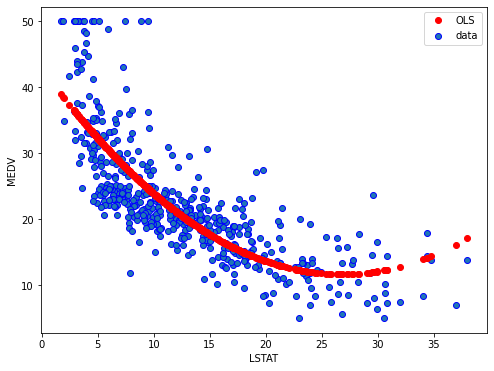

In [17]:
fig,ax1 = plt.subplots(figsize=(8,6))

ax1.scatter(boston_df.LSTAT, boston_df.MEDV, edgecolors='b',label="data")
ax1.set_ylabel('MEDV')
ax1.set_xlabel('LSTAT')

ax1.plot(boston_df.LSTAT, quadratic_results.fittedvalues,color='r',linestyle='none',marker='o', label="OLS")
ax1.legend()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

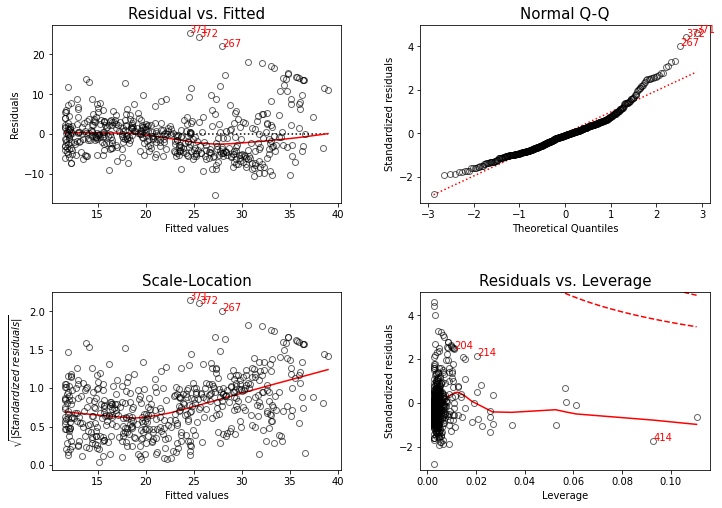

In [18]:
plt.figure(figsize=(10,7))
lm.plot(quadratic_results)